# 1 - Импорт библиотек

Загружаем стандартные библиотеки для работы с данными - pandas, numpy. Для визуализации - matplotlib. Для построения стратегий - pqr.

In [1]:
import pqr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

Убедитесь, что установленные библиотеки не ниже следующих версий:

pqr - 0.4.1

pandas - 1.3.0

numpy - 1.21.0

matplotlib - 3.4.2

Проверить версии (только в Jupyter) можно следующим способом:

In [2]:
from importlib.metadata import version
version('pqr')

'0.4.1'

In [3]:
import os; os.chdir("..")
os.chdir('C:/Users/tomtosov/Desktop/data/countries_data/countries_data/csv/usa')

# 2 - Загрузка и предобработка данных

Загружаем файл с ценами закрытия американских акций. Первый столбец с датами - индекс наших таблиц.

Объемы Refinitiv выдает в тысячах акций, поэтому дополнительно умножаем их на цену и на 1000

In [4]:
prices = pd.read_csv("close_price.csv", parse_dates=True, index_col=0)#["2010":]
volume = pd.read_csv("trading_volume.csv", parse_dates=True, index_col=0)#["2010":]
volume = prices * volume * 1000

mcap = pd.read_csv("mcap.csv", parse_dates=True, index_col=0)
pe = pd.read_csv("pe.csv", parse_dates=True, index_col=0)

В функциях ниже обязательно задаем 2 или более переменных, иначе сохраним таблицу как кортеж

In [5]:
prices, pe, mcap, volume = pqr.utils.replace_with_nan(prices, pe, mcap, volume, to_replace=0) # замееняет 0 на NaN
prices, pe, mcap, volume = pqr.utils.align(prices, pe, mcap, volume) # Приравнивает матрицы к одному размеру и составу

Если после pqr.utils.align все матрицы затерлись - проверьте сортировку, из-за разной последовательности одинаковых акций может произойти удаление столбцов

# 3 - Настраиваем Universe

In [6]:
prices.tail()

,1-800 CONTACTS DEAD,1-800-FLOWERS.COM 'A',180 LIFE SCIENCES,1895 BANCORP OF WISCONSIN,1ST BANC. IND DEAD,1ST CENTURY BANCSHARES DEAD,1ST CONSTITUTION BANCORP,1ST INDC.FINL.GP. DEAD,1ST SOURCE,1ST UNITED BANCORP DEAD,...,ZORAN DEAD,ZULILY CLASS A DEAD,ZUMIEZ,ZURICH REIN.CTR. DEAD,ZURN DEAD,ZWEIG STRATEGY FUND,ZYCON DEAD,ZYGO DEAD,ZYNEX,ZYTEC DEAD
Name,,,,,,,,,,,,,,,,,,,,,
2021-04-30,NaN,31.975,9.65,14.4800,NaN,NaN,19.18,NaN,47.59,NaN,...,NaN,NaN,42.97,NaN,NaN,NaN,NaN,NaN,14.77,NaN
2021-05-31,NaN,30.470,8.54,14.7450,NaN,NaN,21.10,NaN,49.47,NaN,...,NaN,NaN,43.82,NaN,NaN,NaN,NaN,NaN,15.22,NaN
2021-06-30,NaN,31.870,10.00,15.0263,NaN,NaN,20.69,NaN,46.46,NaN,...,NaN,NaN,48.99,NaN,NaN,NaN,NaN,NaN,15.53,NaN
2021-07-30,NaN,30.500,7.57,10.6900,NaN,NaN,21.59,NaN,45.79,NaN,...,NaN,NaN,43.65,NaN,NaN,NaN,NaN,NaN,13.89,NaN
2021-08-31,NaN,31.760,5.89,10.9400,NaN,NaN,22.41,NaN,47.00,NaN,...,NaN,NaN,40.19,NaN,NaN,NaN,NaN,NaN,13.41,NaN


In [7]:
universe = prices > 8
universe.tail()

,1-800 CONTACTS DEAD,1-800-FLOWERS.COM 'A',180 LIFE SCIENCES,1895 BANCORP OF WISCONSIN,1ST BANC. IND DEAD,1ST CENTURY BANCSHARES DEAD,1ST CONSTITUTION BANCORP,1ST INDC.FINL.GP. DEAD,1ST SOURCE,1ST UNITED BANCORP DEAD,...,ZORAN DEAD,ZULILY CLASS A DEAD,ZUMIEZ,ZURICH REIN.CTR. DEAD,ZURN DEAD,ZWEIG STRATEGY FUND,ZYCON DEAD,ZYGO DEAD,ZYNEX,ZYTEC DEAD
Name,,,,,,,,,,,,,,,,,,,,,
2021-04-30,False,True,True,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2021-05-31,False,True,True,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2021-06-30,False,True,True,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2021-07-30,False,True,False,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2021-08-31,False,True,False,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False


Фильтр для Universe из нескольких значений

In [8]:
mcap.tail()

,1-800 CONTACTS DEAD,1-800-FLOWERS.COM 'A',180 LIFE SCIENCES,1895 BANCORP OF WISCONSIN,1ST BANC. IND DEAD,1ST CENTURY BANCSHARES DEAD,1ST CONSTITUTION BANCORP,1ST INDC.FINL.GP. DEAD,1ST SOURCE,1ST UNITED BANCORP DEAD,...,ZORAN DEAD,ZULILY CLASS A DEAD,ZUMIEZ,ZURICH REIN.CTR. DEAD,ZURN DEAD,ZWEIG STRATEGY FUND,ZYCON DEAD,ZYGO DEAD,ZYNEX,ZYTEC DEAD
Name,,,,,,,,,,,,,,,,,,,,,
2021-04-30,NaN,1180.87,232.69,72.00,NaN,NaN,196.89,NaN,1202.54,NaN,...,NaN,NaN,1106.41,NaN,NaN,NaN,NaN,NaN,514.69,NaN
2021-05-31,NaN,1125.29,205.93,71.44,NaN,NaN,216.60,NaN,1250.04,NaN,...,NaN,NaN,1128.30,NaN,NaN,NaN,NaN,NaN,530.37,NaN
2021-06-30,NaN,1177.00,241.13,72.80,NaN,NaN,212.39,NaN,1173.98,NaN,...,NaN,NaN,1263.01,NaN,NaN,NaN,NaN,NaN,541.17,NaN
2021-07-30,NaN,1126.40,232.92,68.39,NaN,NaN,222.05,NaN,1145.03,NaN,...,NaN,NaN,1125.34,NaN,NaN,NaN,NaN,NaN,482.82,NaN
2021-08-31,NaN,1172.93,198.88,70.07,NaN,NaN,230.49,NaN,1175.29,NaN,...,NaN,NaN,1011.36,NaN,NaN,NaN,NaN,NaN,466.14,NaN


In [9]:
prices.tail()

,1-800 CONTACTS DEAD,1-800-FLOWERS.COM 'A',180 LIFE SCIENCES,1895 BANCORP OF WISCONSIN,1ST BANC. IND DEAD,1ST CENTURY BANCSHARES DEAD,1ST CONSTITUTION BANCORP,1ST INDC.FINL.GP. DEAD,1ST SOURCE,1ST UNITED BANCORP DEAD,...,ZORAN DEAD,ZULILY CLASS A DEAD,ZUMIEZ,ZURICH REIN.CTR. DEAD,ZURN DEAD,ZWEIG STRATEGY FUND,ZYCON DEAD,ZYGO DEAD,ZYNEX,ZYTEC DEAD
Name,,,,,,,,,,,,,,,,,,,,,
2021-04-30,NaN,31.975,9.65,14.4800,NaN,NaN,19.18,NaN,47.59,NaN,...,NaN,NaN,42.97,NaN,NaN,NaN,NaN,NaN,14.77,NaN
2021-05-31,NaN,30.470,8.54,14.7450,NaN,NaN,21.10,NaN,49.47,NaN,...,NaN,NaN,43.82,NaN,NaN,NaN,NaN,NaN,15.22,NaN
2021-06-30,NaN,31.870,10.00,15.0263,NaN,NaN,20.69,NaN,46.46,NaN,...,NaN,NaN,48.99,NaN,NaN,NaN,NaN,NaN,15.53,NaN
2021-07-30,NaN,30.500,7.57,10.6900,NaN,NaN,21.59,NaN,45.79,NaN,...,NaN,NaN,43.65,NaN,NaN,NaN,NaN,NaN,13.89,NaN
2021-08-31,NaN,31.760,5.89,10.9400,NaN,NaN,22.41,NaN,47.00,NaN,...,NaN,NaN,40.19,NaN,NaN,NaN,NaN,NaN,13.41,NaN


In [10]:
hard_universe = (prices > 2) & (mcap > 1000)
hard_universe.tail()

,1-800 CONTACTS DEAD,1-800-FLOWERS.COM 'A',180 LIFE SCIENCES,1895 BANCORP OF WISCONSIN,1ST BANC. IND DEAD,1ST CENTURY BANCSHARES DEAD,1ST CONSTITUTION BANCORP,1ST INDC.FINL.GP. DEAD,1ST SOURCE,1ST UNITED BANCORP DEAD,...,ZORAN DEAD,ZULILY CLASS A DEAD,ZUMIEZ,ZURICH REIN.CTR. DEAD,ZURN DEAD,ZWEIG STRATEGY FUND,ZYCON DEAD,ZYGO DEAD,ZYNEX,ZYTEC DEAD
Name,,,,,,,,,,,,,,,,,,,,,
2021-04-30,False,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2021-05-31,False,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2021-06-30,False,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2021-07-30,False,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2021-08-31,False,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


Таблица для отслеживания доходности портфеля. Этот блок не меняется при любых типах стратегий

Проверяем как работает отслеживание доходности

In [11]:
returns_calculator = pqr.utils.partial(
    pqr.calculate_returns, 
    universe_returns=pqr.prices_to_returns(prices),
)

In [12]:
prices.tail()

,1-800 CONTACTS DEAD,1-800-FLOWERS.COM 'A',180 LIFE SCIENCES,1895 BANCORP OF WISCONSIN,1ST BANC. IND DEAD,1ST CENTURY BANCSHARES DEAD,1ST CONSTITUTION BANCORP,1ST INDC.FINL.GP. DEAD,1ST SOURCE,1ST UNITED BANCORP DEAD,...,ZORAN DEAD,ZULILY CLASS A DEAD,ZUMIEZ,ZURICH REIN.CTR. DEAD,ZURN DEAD,ZWEIG STRATEGY FUND,ZYCON DEAD,ZYGO DEAD,ZYNEX,ZYTEC DEAD
Name,,,,,,,,,,,,,,,,,,,,,
2021-04-30,NaN,31.975,9.65,14.4800,NaN,NaN,19.18,NaN,47.59,NaN,...,NaN,NaN,42.97,NaN,NaN,NaN,NaN,NaN,14.77,NaN
2021-05-31,NaN,30.470,8.54,14.7450,NaN,NaN,21.10,NaN,49.47,NaN,...,NaN,NaN,43.82,NaN,NaN,NaN,NaN,NaN,15.22,NaN
2021-06-30,NaN,31.870,10.00,15.0263,NaN,NaN,20.69,NaN,46.46,NaN,...,NaN,NaN,48.99,NaN,NaN,NaN,NaN,NaN,15.53,NaN
2021-07-30,NaN,30.500,7.57,10.6900,NaN,NaN,21.59,NaN,45.79,NaN,...,NaN,NaN,43.65,NaN,NaN,NaN,NaN,NaN,13.89,NaN
2021-08-31,NaN,31.760,5.89,10.9400,NaN,NaN,22.41,NaN,47.00,NaN,...,NaN,NaN,40.19,NaN,NaN,NaN,NaN,NaN,13.41,NaN


Бенчмарк на основе выборки. Обратите внимание, что юниверс уже должен быть задан к этому моменту

In [13]:
universe = prices > 2

In [14]:
ew_benchmark = pqr.Benchmark.from_universe(
    universe=universe, # True-False таблица доступных для покупки акций после фильтра
    allocator=pqr.equal_weights, # способ задания весов
    calculator=returns_calculator, # доходность для расчетов (всегда одинаковая)
    name='EW_Benchmark' # имя для отображения на графиках и в таблцицах
)

In [15]:
ew_benchmark

Benchmark(name='EW_Benchmark')

In [16]:
ew_benchmark.returns

EW_Benchmark
1973-01-31    0.000000
1973-02-28   -0.074921
1973-03-30   -0.026508
1973-04-30   -0.074544
1973-05-31   -0.077255
                ...   
2021-04-30    0.022419
2021-05-31    0.024045
2021-06-30    0.014585
2021-07-30   -0.026013
2021-08-31    0.020507
Length: 584, dtype: float64

# 4 - Виды стратегий

1) **Cross-sectional**. Нарезаем выборку на х портфелей-квантилей;

2) **Time-series**. Создаем два портфеля, куда отбираем акции превысившие пороговое значение z или нет;

3) **Smartbeta**. Покупаем все акции, которые прошли фильтр, но веса задаем по фактору w.

# 4.1 - Создаем фактор. Этот пункт выполняется для всех трех видов стратегий

Фактор = пандасовская таблица DataFrame с целевым показателем по всем акциям, обработанная определенным образом (например, 3-0-3)

In [17]:
prices.tail()

,1-800 CONTACTS DEAD,1-800-FLOWERS.COM 'A',180 LIFE SCIENCES,1895 BANCORP OF WISCONSIN,1ST BANC. IND DEAD,1ST CENTURY BANCSHARES DEAD,1ST CONSTITUTION BANCORP,1ST INDC.FINL.GP. DEAD,1ST SOURCE,1ST UNITED BANCORP DEAD,...,ZORAN DEAD,ZULILY CLASS A DEAD,ZUMIEZ,ZURICH REIN.CTR. DEAD,ZURN DEAD,ZWEIG STRATEGY FUND,ZYCON DEAD,ZYGO DEAD,ZYNEX,ZYTEC DEAD
Name,,,,,,,,,,,,,,,,,,,,,
2021-04-30,NaN,31.975,9.65,14.4800,NaN,NaN,19.18,NaN,47.59,NaN,...,NaN,NaN,42.97,NaN,NaN,NaN,NaN,NaN,14.77,NaN
2021-05-31,NaN,30.470,8.54,14.7450,NaN,NaN,21.10,NaN,49.47,NaN,...,NaN,NaN,43.82,NaN,NaN,NaN,NaN,NaN,15.22,NaN
2021-06-30,NaN,31.870,10.00,15.0263,NaN,NaN,20.69,NaN,46.46,NaN,...,NaN,NaN,48.99,NaN,NaN,NaN,NaN,NaN,15.53,NaN
2021-07-30,NaN,30.500,7.57,10.6900,NaN,NaN,21.59,NaN,45.79,NaN,...,NaN,NaN,43.65,NaN,NaN,NaN,NaN,NaN,13.89,NaN
2021-08-31,NaN,31.760,5.89,10.9400,NaN,NaN,22.41,NaN,47.00,NaN,...,NaN,NaN,40.19,NaN,NaN,NaN,NaN,NaN,13.41,NaN


In [18]:
momentum_params = pqr.utils.compose(
    pqr.utils.partial(pqr.factors.filter, universe=universe), # применяем фильтр аналогичный юниверс
    pqr.utils.partial(pqr.factors.look_back_pct_change, period=1), # как посчитать фактор + сколько наблюдать
    pqr.utils.partial(pqr.factors.lag, period=1), # по-умолчанию лучше выставлять как 1
    pqr.utils.partial(pqr.factors.hold, period=1), # сколько держим купленные бумаги
)

In [19]:
30.500/30.470 - 1

0.0009845749917951618

In [20]:
momentum_factor = momentum_params(prices)
momentum_factor

,1-800 CONTACTS DEAD,1-800-FLOWERS.COM 'A',180 LIFE SCIENCES,1895 BANCORP OF WISCONSIN,1ST BANC. IND DEAD,1ST CENTURY BANCSHARES DEAD,1ST CONSTITUTION BANCORP,1ST INDC.FINL.GP. DEAD,1ST SOURCE,1ST UNITED BANCORP DEAD,...,ZORAN DEAD,ZULILY CLASS A DEAD,ZUMIEZ,ZURICH REIN.CTR. DEAD,ZURN DEAD,ZWEIG STRATEGY FUND,ZYCON DEAD,ZYGO DEAD,ZYNEX,ZYTEC DEAD
Name,,,,,,,,,,,,,,,,,,,,,
1973-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.086906,NaN,NaN,NaN,NaN,NaN
1973-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.119289,NaN,NaN,NaN,NaN,NaN
1973-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.152738,NaN,NaN,NaN,NaN,NaN
1973-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.020408,NaN,NaN,NaN,NaN,NaN
1973-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.031667,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,NaN,-0.023692,0.480813,0.394707,NaN,NaN,0.003419,NaN,0.072346,NaN,...,NaN,NaN,-0.048358,NaN,NaN,NaN,NaN,NaN,0.051653,NaN
2021-05-31,NaN,0.158095,0.471037,0.016897,NaN,NaN,0.089154,NaN,0.000210,NaN,...,NaN,NaN,0.001632,NaN,NaN,NaN,NaN,NaN,-0.032744,NaN
2021-06-30,NaN,-0.047068,-0.115026,0.018301,NaN,NaN,0.100104,NaN,0.039504,NaN,...,NaN,NaN,0.019781,NaN,NaN,NaN,NaN,NaN,0.030467,NaN


Сколько раз компания х гипотетически могла попасть в мой портфель (топ-25)

In [21]:
momentum_factor.count(axis=0).sort_values(ascending=False).head(25)

HALLIBURTON                578
MOTOROLA SOLUTIONS         576
PROCTER & GAMBLE           576
INTERNATIONAL BUS.MCHS.    576
EMERSON ELECTRIC           574
GENUINE PARTS              574
3M                         574
GOODYEAR TIRE & RUB.       572
FOOT LOCKER                572
WW GRAINGER                572
JP MORGAN CHASE & CO.      572
CARPENTER TECH.            572
SCHLUMBERGER               571
AMERICAN INTL.GP.          570
ENTERGY                    570
CHEVRON                    570
XCEL ENERGY                570
LINCOLN NATIONAL           569
ELI LILLY                  569
INTERNATIONAL PAPER        569
HOWMET AEROSPACE           568
INTL.FLAVORS & FRAG.       568
AIR PRDS.& CHEMS.          568
LOUISIANA PACIFIC          567
CALERES                    566
dtype: int64

# 4.2 - Собираем портфели

Параметры для создания портфеля:

1) factor - это таблица с фактором для принятия решений (для моментума это цены). Внутри в параметрах число означает сколько портфелей мы хотим получить. Т.е. на какое количество равных акций будет разделена выборка."better" принимает всего два значения - "more" и "less". Если мы выберем more, то в портфель победителей попадут акции с наибольшим ростом цены, в портфель p2 акции из следующего квантиля по динамике цен. И так по убывающей до портфеля losers. Если мы выберем less, то все будет наоборот. Выбирайте метод исходя из экономического смысла.;

2) strategies - способ построения стратегия. Для cross-section это split_quantiles. Полный список тут https://github.com/atomtosov/pqr/blob/main/pqr/factors/strategies.py

3) allocator - способ задания весов. Пока берем равные. Задание весов по фактору z будет в следующем примере;

4) calculator=returns_calculator Всегда без изменений. Отслеживаем доходность портфеля по доходности всех акций в выборке;

5) add_wml - включение арбитражного (Winners Minus Losers) портфеля из покупки победителей и шорта по проигравшим;

In [22]:
cs_ew_momentum_portfolios = pqr.factors.backtest_factor_portfolios(
    factor=momentum_factor, # на основе чего принимаем решения (матрица или таблица)
    strategies=pqr.factors.split_quantiles(4, better='more'), # split_quantiles - означает нарезку выборки на х% акций
    allocator=pqr.equal_weights, # веса равные
    calculator=returns_calculator, # откуда тянем доходность для оценки портфеля
    add_wml=False, # нужен ли арбитражный портфель
)

In [23]:
cs_ew_momentum_portfolios # [] - список

[Portfolio(name='Winners'),
 Portfolio(name='Neutral 1'),
 Portfolio(name='Neutral 2'),
 Portfolio(name='Losers')]

In [24]:
cs_ew_momentum_portfolios[0]

Portfolio(name='Winners')

In [25]:
cs_ew_momentum_portfolios[-1]

Portfolio(name='Losers')

**1 таблица портфеля (из двух)**

In [26]:
cs_ew_momentum_portfolios[0].returns

Winners
1973-03-30    0.000000
1973-04-30   -0.053943
1973-05-31   -0.080945
1973-06-29   -0.034078
1973-07-31    0.078253
                ...   
2021-04-30    0.015388
2021-05-31    0.038910
2021-06-30    0.015821
2021-07-30   -0.042421
2021-08-31    0.019210
Length: 582, dtype: float64

**2 таблица портфеля (последняя)**

In [27]:
cs_ew_momentum_portfolios[0].holdings

,1-800 CONTACTS DEAD,1-800-FLOWERS.COM 'A',180 LIFE SCIENCES,1895 BANCORP OF WISCONSIN,1ST BANC. IND DEAD,1ST CENTURY BANCSHARES DEAD,1ST CONSTITUTION BANCORP,1ST INDC.FINL.GP. DEAD,1ST SOURCE,1ST UNITED BANCORP DEAD,...,ZORAN DEAD,ZULILY CLASS A DEAD,ZUMIEZ,ZURICH REIN.CTR. DEAD,ZURN DEAD,ZWEIG STRATEGY FUND,ZYCON DEAD,ZYGO DEAD,ZYNEX,ZYTEC DEAD
Winners,,,,,,,,,,,,,,,,,,,,,
1973-03-30,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1973-04-30,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1973-05-31,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1973-06-29,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.002451,0.0,0.0,0.0,0.0,0.0
1973-07-31,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,0.0,0.000000,0.001449,0.001449,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2021-05-31,0.0,0.001458,0.001458,0.000000,0.0,0.0,0.001458,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2021-06-30,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.001460,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Сколько раз акция Х фактически попала в портфель Winners  (за все время, топ-25)

In [28]:
(cs_ew_momentum_portfolios[0].holdings > 0).sum(axis=0).sort_values(ascending=False).head(25)

COEUR MINING              180
ADVANCED MICRO DEVICES    178
VALHI                     169
NABORS INDUSTRIES         168
US ENERGY                 167
VAXART                    165
COMSTOCK RES.             161
WESTERN DIGITAL           157
PARK OHIO HOLDINGS        156
GT BIOPHARMA              156
TUTOR PERINI              155
US GOLD                   152
ABEONA THERAPEUTICS       152
GENESCO                   152
TENET HEALTHCARE          151
COHERENT                  149
TELIGENT                  146
NEWMONT                   145
TIDEWATER                 145
APA                       144
NAVISTAR INTL. DEAD       143
MOTOROLA SOLUTIONS        143
ANDEAVOR DEAD             143
HECLA MINING              142
XOMA                      142
dtype: int64

# 5 - Таблица с метриками и график

Создаем пустую таблицу-шаблон, которую будем наполнять неограниченным набором метрик через .add_metric

1) Список метрик на основе доходностей https://github.com/atomtosov/pqr/blob/main/pqr/metrics/returns_based.py

2) Список метрик на основе сравнения с бенчмарком https://github.com/atomtosov/pqr/blob/main/pqr/metrics/benchmark_based.py

3) Список метрик на основе удерживаемых позиций https://github.com/atomtosov/pqr/blob/main/pqr/metrics/holdings_based.py

In [29]:
table = pqr.metrics.Table()

 Поочередно добавляем нужные метрики

**Аннуализированная доходность**

In [30]:
table.add_metric( # начало всегда одинаковое
    pqr.utils.partial( # тут тоже без изменений
        pqr.metrics.mean_return, # название самой метрики
        statistics=True, # нужно ли отражать t-статистику и значимость* в таблицах
        annualizer=12, # аннуализируем месячную доходность в годовую (в году 12 месяцев, 52 недели и 252 дня)
    ),
    multiplier=100, # домножение на 100 для отображения на графиках
    name="Monthly Mean Return, %", # название в таблицах. ВАЖНО, чтобы не повторялось с другими метриками, иначе не отобразится
)

**Волатильность**

In [31]:
table.add_metric(
    pqr.utils.partial(
        pqr.metrics.volatility,
        annualizer=12,
    ),
    multiplier=100,
    name="Monthly Volatility, %",
)

**Альфа**

In [32]:
table.add_metric(
    pqr.utils.partial(
        pqr.metrics.alpha,
        benchmark=ew_benchmark, # для относительных метрик указываем бенчмарк
        statistics=True,
        annualizer=12,
    ),
    multiplier=100,
    name="Alpha, %",
)

**Процент прибыльных сделок**

In [33]:
table.add_metric(
    pqr.utils.partial(
        pqr.metrics.win_rate,
    ),
    multiplier=100,
    name="Win Rate, %",
)

**Максимальная просадка**

In [34]:
table.add_metric(
    pqr.utils.partial(
        pqr.metrics.max_drawdown,
    ),
    multiplier=100,
    name="Max Drawdown, %",
)

**График накопленной доходности с лог шкалой**

trailing метрики для графика

In [35]:
fig = pqr.metrics.Figure( # начало графика всегда одинаковое
    pqr.metrics.compounded_returns, # метрика для графика. Обязательно должна быть в виде ряда (trailing), а не точки 
    name="Compounded Returns", # название
    benchmark=ew_benchmark, # бенчмарк для наложения на график
    log_scale=True, # нужна ли лог шкала. Используйте, когда разность в доходности портфелей так высока, что график нечитаем
)

In [36]:
summary = pqr.metrics.Dashboard([table, fig])

# 6 - Результаты портфелей

Отражаем результаты всех портфелей через созданный дэшборд summary:

In [37]:
cs_ew_momentum_portfolios

[Portfolio(name='Winners'),
 Portfolio(name='Neutral 1'),
 Portfolio(name='Neutral 2'),
 Portfolio(name='Losers')]

In [38]:
cs_ew_momentum_portfolios[0]

Portfolio(name='Winners')

,Winners,Neutral 1,Neutral 2,Losers
"Monthly Mean Return, %",15.79*** (3.94),12.18*** (5.33),12.99*** (5.41),13.61*** (4.14)
"Monthly Volatility, %",27.94,15.90,16.72,22.87
"Alpha, %",1.79 (0.59),0.64 (1.33),0.83* (1.75),-2.64*** (-2.74)
"Win Rate, %",63.06,63.92,64.60,60.31
"Max Drawdown, %",-53.36,-51.12,-52.25,-58.06


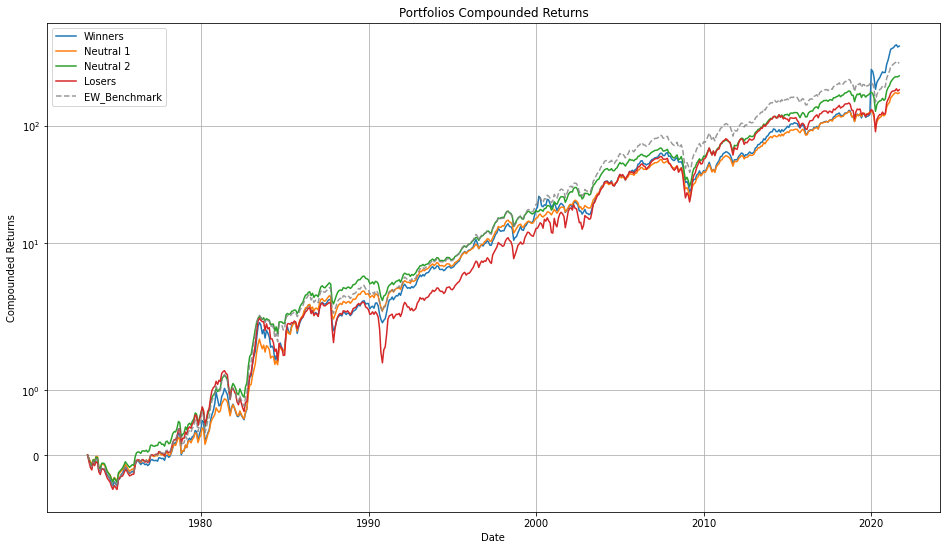

In [39]:
summary.display(cs_ew_momentum_portfolios)

Проверка

In [40]:
cs_ew_momentum_portfolios[0].holdings[-1:].sum(axis=1)

Winners
2021-08-31    1.0
dtype: float64

Сохраняем предлагаемые покупки на след период в эксель

In [41]:
cs_ew_momentum_portfolios[0].holdings[-1:].to_excel('next_buys.xlsx')

# 7 - Ставим веса в портфеле по капитализации

Сперва превратим исходную таблицу с капитализацией в фактор. В первоначальном виде ее использовать нельзя. Для этого зададим отдельные параметры, которые будут отличаться от моментума. Мы просто берем mcap на последний период (1):

In [42]:
static_params = pqr.utils.compose(
    pqr.utils.partial(pqr.factors.look_back_mean, period=0), 
    pqr.utils.partial(pqr.factors.lag, period=1), 
    pqr.utils.partial(pqr.factors.hold, period=1), # для весов hold = 1 всегда
)

Применяем параметры к таблице с капитализацией

In [43]:
pe = 1/pe # инверсия при необходимости

value_factor = static_params(pe)

Считаем тот же самый моментум (фактор без изменений), но меняем способ задания весов с равных на взвешенные по капитализации. Для этого вносим изменения в allocator:

In [44]:
cs_vw_momentum_portfolios = pqr.factors.backtest_factor_portfolios(
    factor=momentum_factor, # без изменений
    strategies=pqr.factors.split_quantiles(4, 'more'), # без изменений
    allocator=pqr.utils.compose( # пошли отличия в весах
        pqr.utils.partial( # без изменений
            pqr.normalized_weights, # всегда без изменений, нормализация весов
            base_weights=value_factor # задаем фактор весов
        ),
    ),
    calculator=returns_calculator,
    add_wml=False
)

Результаты изменились в худшую сторону. Дорогие компании росли медленее и замедлили общий рост портфеля в сравнении с равными весами:

In [45]:
cs_vw_momentum_portfolios[0]

Portfolio(name='Winners')

In [46]:
cs_ew_momentum_portfolios[0]

Portfolio(name='Winners')

,Winners,Neutral 1,Neutral 2,Losers
"Monthly Mean Return, %",172.80 (1.10),13.22*** (5.65),14.10*** (5.95),13.55*** (3.98)
"Monthly Volatility, %",1098.94,16.30,16.49,23.74
"Alpha, %",143.85 (0.89),1.97** (2.25),2.39*** (3.40),-2.20 (-1.41)
"Win Rate, %",62.54,64.60,64.43,60.31
"Max Drawdown, %",-55.52,-50.56,-51.46,-66.69


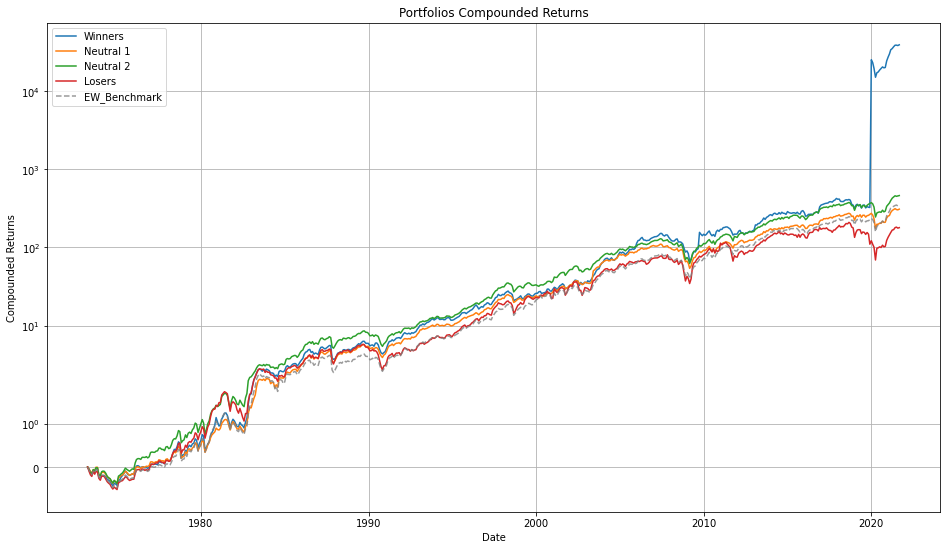

In [47]:
summary.display(cs_vw_momentum_portfolios)

,Winners,Winners
"Monthly Mean Return, %",172.80 (1.10),15.79*** (3.94)
"Monthly Volatility, %",1098.94,27.94
"Alpha, %",143.85 (0.89),1.79 (0.59)
"Win Rate, %",62.54,63.06
"Max Drawdown, %",-55.52,-53.36


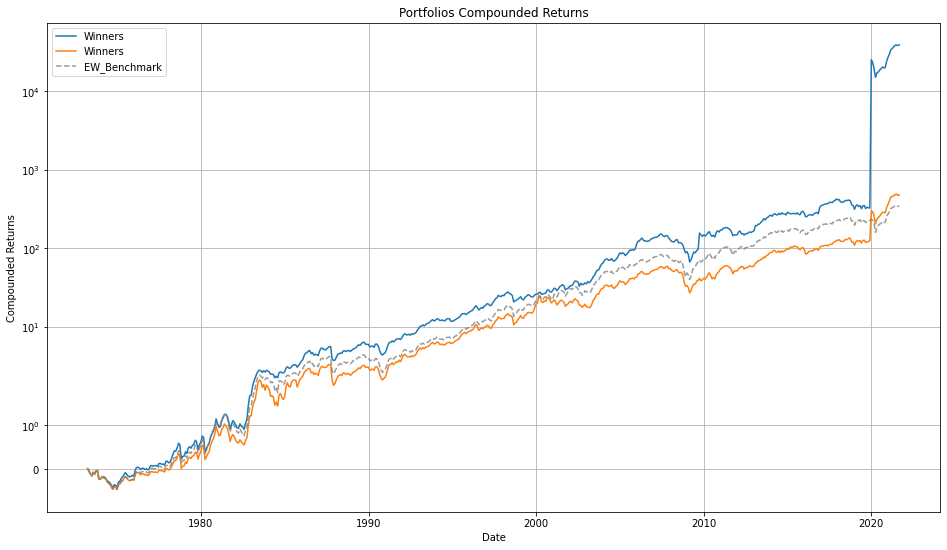

In [48]:
summary.display([cs_vw_momentum_portfolios[0], cs_ew_momentum_portfolios[0]])

In [49]:
cs_vw_momentum_portfolios[0]

Portfolio(name='Winners')

# 8 - Чуть больше аналитики по стратегии

Запросим графики по отдельным метрикам. Графики доступны только для рядов, т.е. trailing metric. Усредненные данные (например, mean return) лучше помещать в таблицу. 

Для сравнения портфеля с весами по капитализации бенчмарк тоже лучше взять с весами по капитализации. Зададим его аналогичным способом и будем использовать в последующих метриках:

In [51]:
mcap_transform = pqr.utils.compose(
    pqr.utils.partial(pqr.factors.look_back_mean, period=0),
    pqr.utils.partial(pqr.factors.lag, period=1),
    pqr.utils.partial(pqr.factors.hold, period=1),
)

In [52]:
size_factor = mcap_transform(mcap)

In [53]:
vw_benchmark = pqr.Benchmark.from_universe(
    universe=universe,
    allocator=pqr.utils.compose(
        pqr.utils.partial(
            pqr.normalized_weights,
            base_weights=size_factor
        ),
    ),
    calculator=returns_calculator,
    name='VW_Benchmark'
)

Как менялась альфа портфеля победителей в течение всего периода. Не забудьте указать конкретный портфель из списка. Например, победители - это первый портфель [0] в списке

Аналогичный график для коэффициента Шарпа:

0.15724100294816612


<AxesSubplot:xlabel='Winners'>

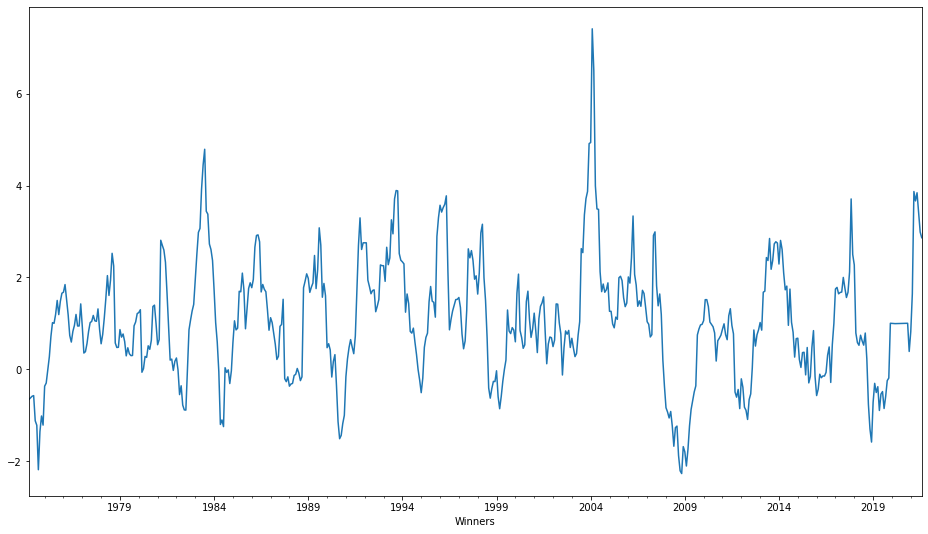

In [55]:
print(pqr.metrics.sharpe_ratio(cs_vw_momentum_portfolios[0], annualizer=12))
pqr.metrics.trailing_sharpe_ratio(cs_vw_momentum_portfolios[0], annualizer=12).plot()

История просадок портфеля:

<AxesSubplot:xlabel='Winners'>

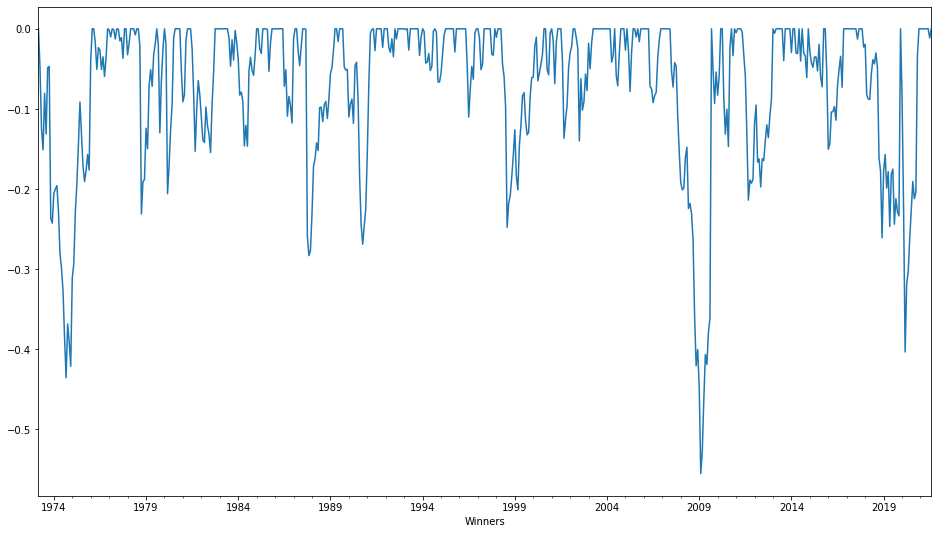

In [56]:
pqr.metrics.drawdown(cs_vw_momentum_portfolios[0]).plot()

Также мы видим, что высокие просадки обусловлены не покупкой особо неудачных бумаг, а общим снижением прибыльных сделок до 30-40% против средние 63%:

0.6254295532646048


<AxesSubplot:xlabel='Winners'>

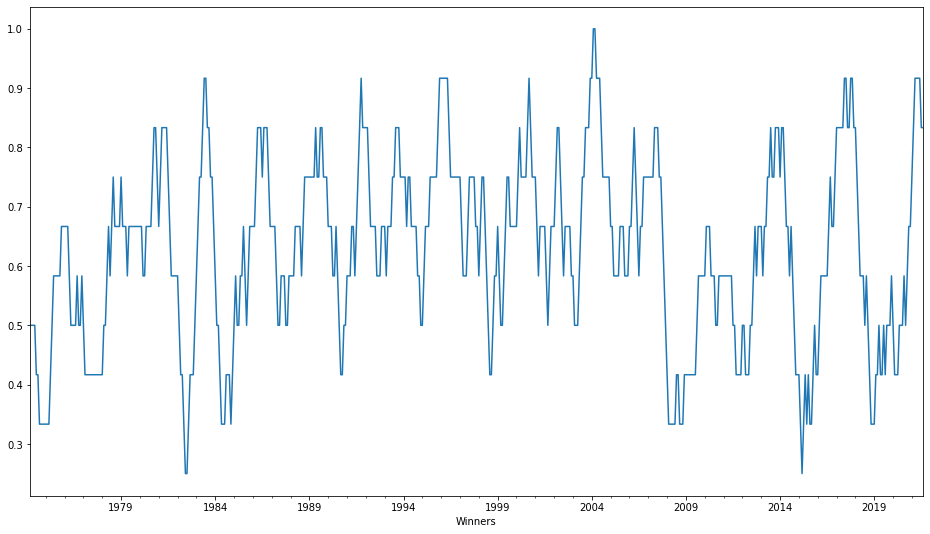

In [57]:
print(pqr.metrics.win_rate(cs_vw_momentum_portfolios[0].returns).mean())
pqr.metrics.trailing_win_rate(cs_vw_momentum_portfolios[0].returns).plot()

# 9 - Альтернативный способ собрать портфель по заданному перцентилю

Через pqr.Portfolio.backtest можно создать конкретный перцентиль по целевому фактору. Например, от 0 до 0.5 акций с моментумом, означает, что мы берем 50% акций с наименьшим фактором:

In [58]:
half_momentum_portolio = pqr.Portfolio.backtest(
    longs=pqr.factors.quantiles(momentum_factor, min_q=0, max_q=0.5), # берем фактор, потом указываем минимальный и макс квант
    shorts=None,
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
    name="0.00_0.50_Momentum"
)

In [59]:
quarter_momentum_portolio = pqr.Portfolio.backtest(
    longs=pqr.factors.quantiles(momentum_factor, min_q=0.75, max_q=1),
    shorts=None,
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
    name="0.75_1.00_Momentum"
)

,0.75_1.00_Momentum,0.00_0.50_Momentum
"Monthly Mean Return, %",15.79*** (3.94),13.30*** (4.74)
"Monthly Volatility, %",27.94,19.55
"Alpha, %",1.79 (0.59),-0.90 (-1.58)
"Win Rate, %",63.06,61.86
"Max Drawdown, %",-53.36,-55.19


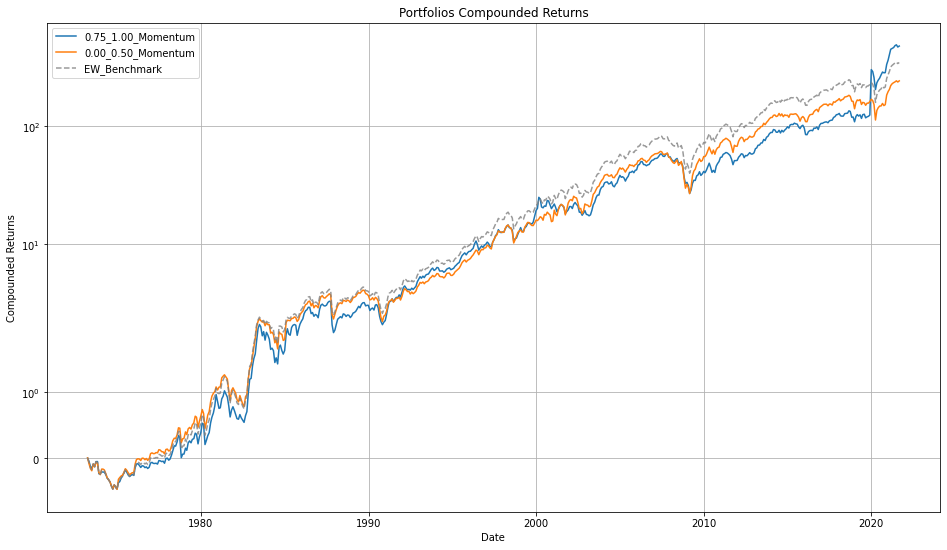

In [60]:
summary.display([quarter_momentum_portolio, half_momentum_portolio])

# 10 - Timeseries

Timeseries способ построения портфелей создает 2 портфеля. Те акции, которые превышают заданное пороговое значение n по фактору z и те, которые не превышают. Если указать better='more', то портфелем победителей будут считаться бумаги с превышением барьера.

В отличие от предыдущего метода, соотношение акций в двух портфелях может быть любым

In [61]:
ts_ew_momentum_portfolios = pqr.factors.backtest_factor_portfolios(
    factor=momentum_factor, # отличий от cs (базовой версии) нет
    strategies=pqr.factors.split_time_series([0.5], better='more'), # Способ построения стратегий теперь split_timeseries
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
    add_wml=False,
)

,Winners,Losers
"Monthly Mean Return, %",11.85** (2.22),13.62*** (5.04)
"Monthly Volatility, %",37.22,18.84
"Alpha, %",-2.84 (-0.61),0.20 (0.26)
"Win Rate, %",51.72,62.37
"Max Drawdown, %",-84.25,-53.49


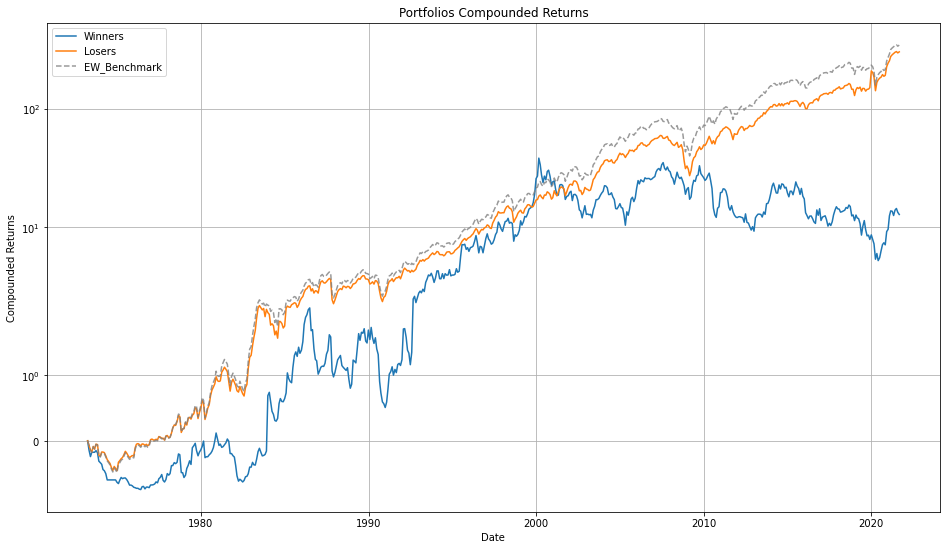

In [62]:
summary.display(ts_ew_momentum_portfolios)

Количество акций в одном портфеле меняется от 0 до 179

In [63]:
(ts_ew_momentum_portfolios[0].holdings>0).sum(axis=1)

Winners
1973-03-30     1
1973-04-30     3
1973-05-31     1
1973-06-29     0
1973-07-31     0
              ..
2021-04-30    25
2021-05-31    13
2021-06-30    22
2021-07-30    22
2021-08-31    10
Length: 582, dtype: int64

# 11 - SmartBeta

Купим все акции прошедшие фильтр и зададим веса обратно пропорциональные мультипликатору p/e.

1) Создадим новый фактор с параметрами 1-0-1, который отражает Value;

2) Подадим его на вход в weighting_factor для определения весов.

In [64]:
pe_for_smart_beta = pe.copy() # создаем копию pe, чтобы следующим действием не внести изменения в первоначальный файл pe
pe_for_smart_beta[pe_for_smart_beta < 0] = 0 # зануляем отрицательные значения, чтобы не было отрицательных весов
pe_for_smart_beta = 1/pe_for_smart_beta # инверсия для того, чтобы у акций с наименьшим p/e был больший вес, а не наоборот

pe_factor = static_params(pe_for_smart_beta) # применяем факторные параметры 1-0-1 для pe

При создании портфеля мы указываем quantiles=1 (купить всю доступную выборку акций), factor не важен, а вот allocator критически важен. Именно по последнему параметру мы задаем основу стратегии:

In [65]:
value_smart_beta = pqr.factors.backtest_factor_portfolios(
    factor=momentum_factor, #неважен
    strategies=pqr.factors.split_quantiles(1, 'more'), # очень важный момент. Для смартбеты всегда ==1
    allocator=pqr.utils.compose(
        pqr.utils.partial(
            pqr.normalized_weights,
            base_weights=pe_factor # супер важный момент
        ),
    ),
    calculator=returns_calculator,
    add_wml=False
)

,Winners
"Monthly Mean Return, %",12.88*** (3.25)
"Monthly Volatility, %",27.63
"Alpha, %",-1.45 (-0.50)
"Win Rate, %",60.31
"Max Drawdown, %",-72.51


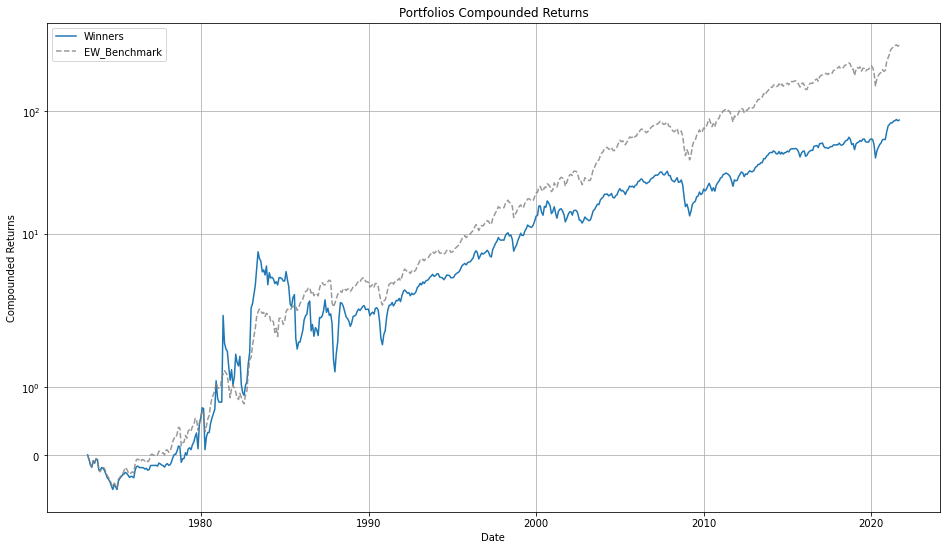

In [66]:
summary.display(value_smart_beta)